#

# Seaborn Learning

In [7]:
# Import seaborn
import seaborn as sns

In [8]:
# Apply the default theme
sns.set_theme()

In [9]:
# Load an example dataset
tips = sns.load_dataset("tips")

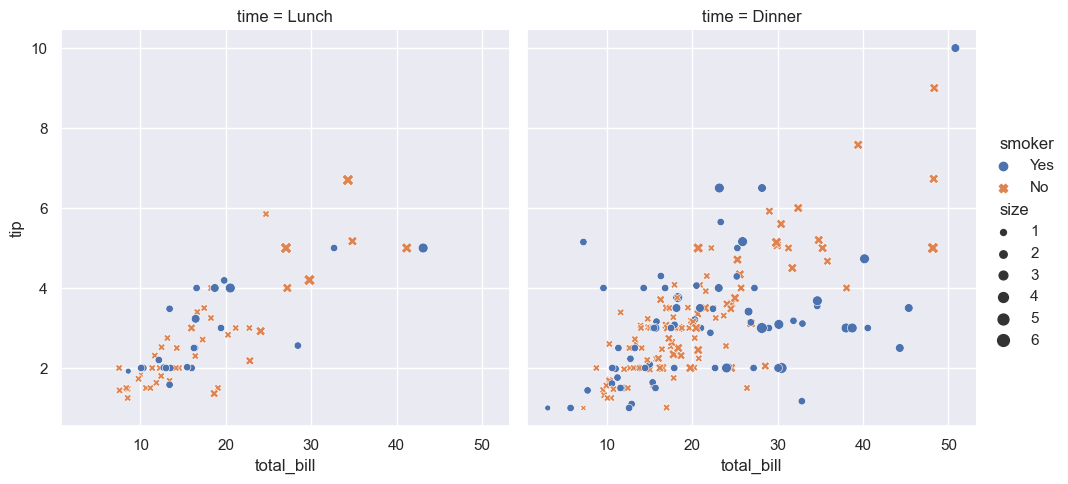

In [10]:
# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

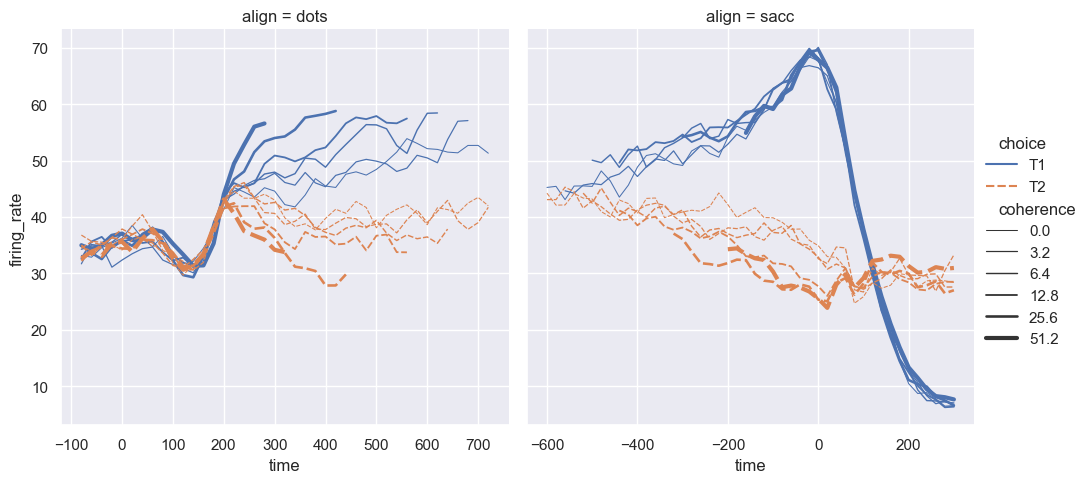

In [11]:
dots = sns.load_dataset("dots")
sns.relplot(
    data = dots, kind = "line",
     x = "time", y = "firing_rate", col = "align",
     hue = "choice", size = "coherence", style = "choice",
     facet_kws = dict(sharex = False)
)

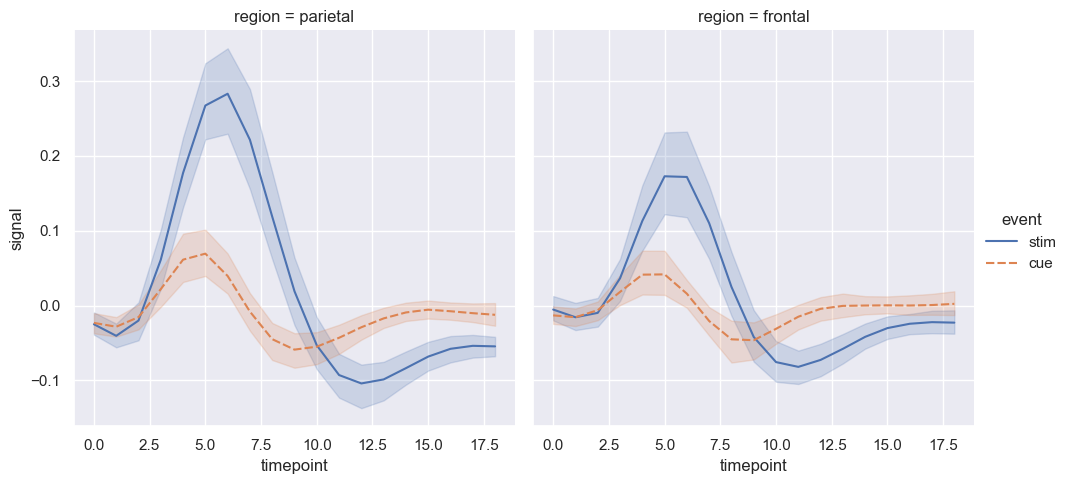

In [12]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data = fmri, kind = "line",
    x = "timepoint", y = "signal", col = "region",
    hue = "event", style = "event"
)

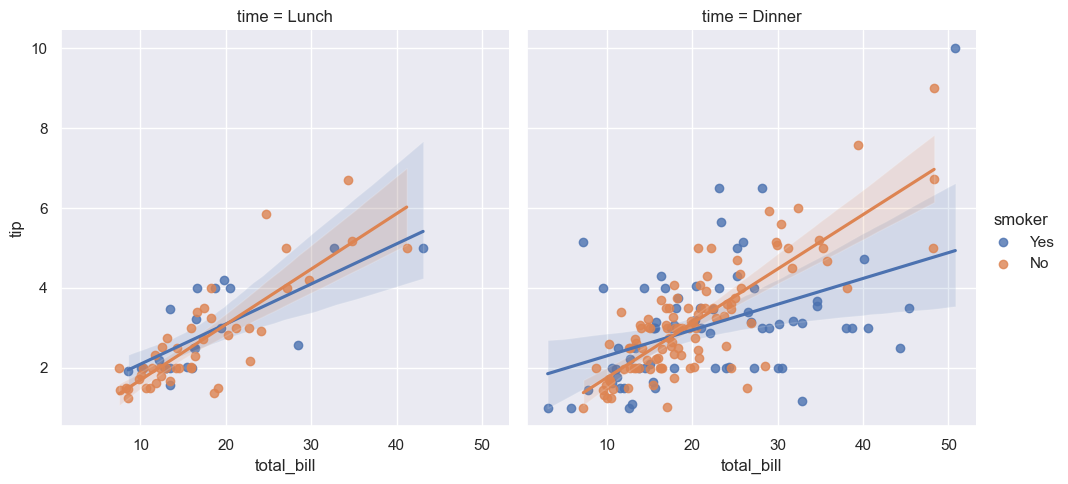

In [13]:
sns.lmplot(data = tips, x = "total_bill", y = "tip", col = "time", hue = "smoker")

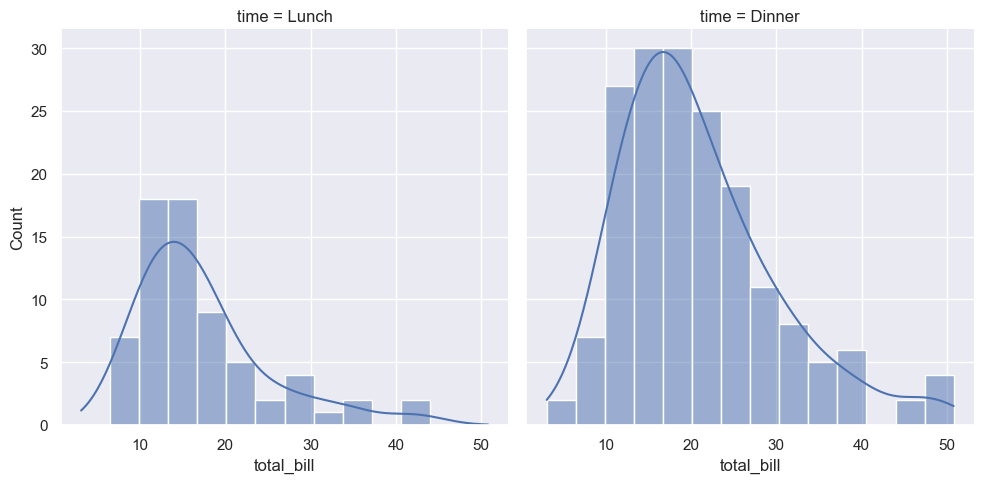

In [14]:
# Distributional Representation
sns.displot(data = tips, x = "total_bill", col = "time", kde = True)

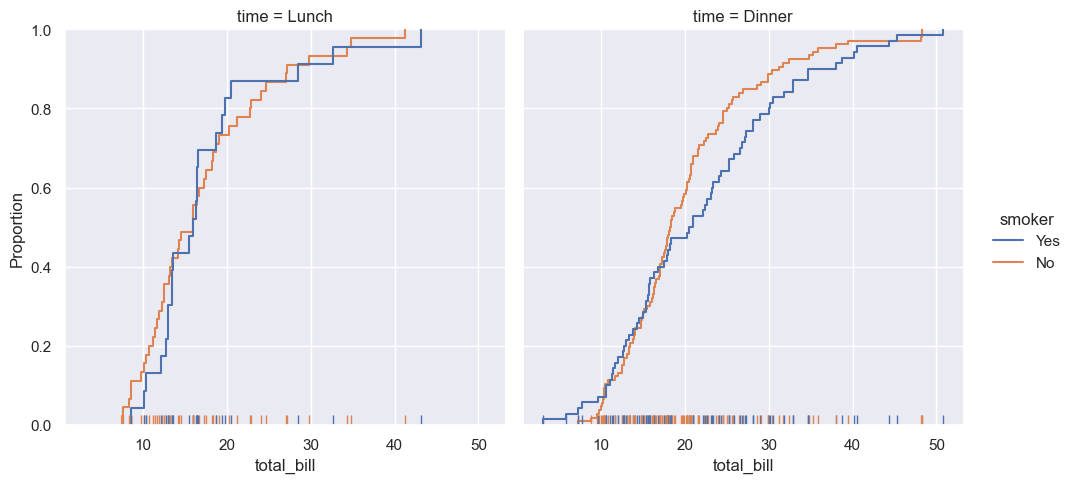

In [16]:
sns.displot(data = tips, kind = "ecdf", x = "total_bill", col = "time", hue = "smoker", rug = True)

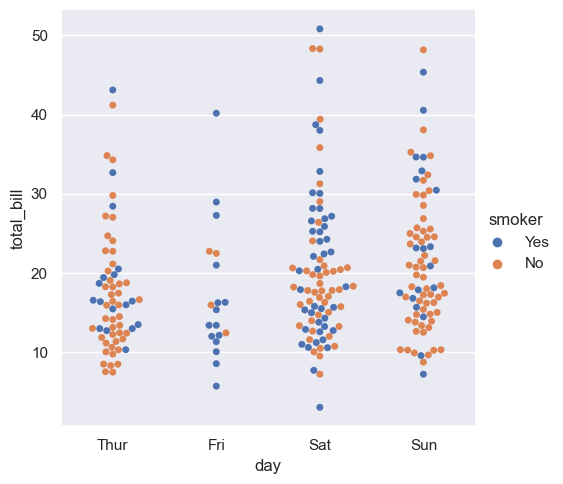

In [17]:
# Plots Categorical Data
sns.catplot(data = tips, kind = "swarm", x = "day", y="total_bill", hue="smoker")

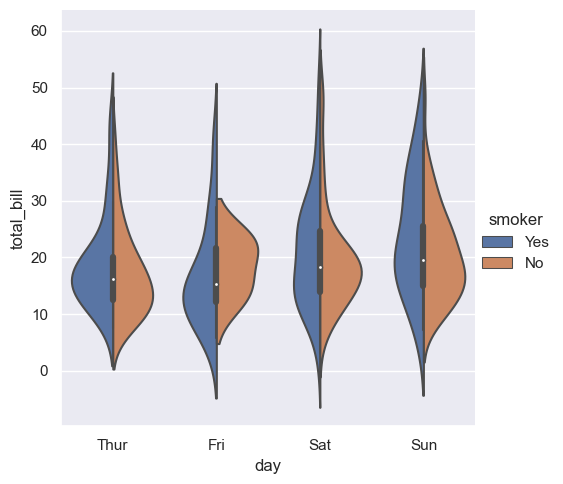

In [19]:
sns.catplot(data = tips, kind = "violin", x = "day", y="total_bill", hue = "smoker", split = True)

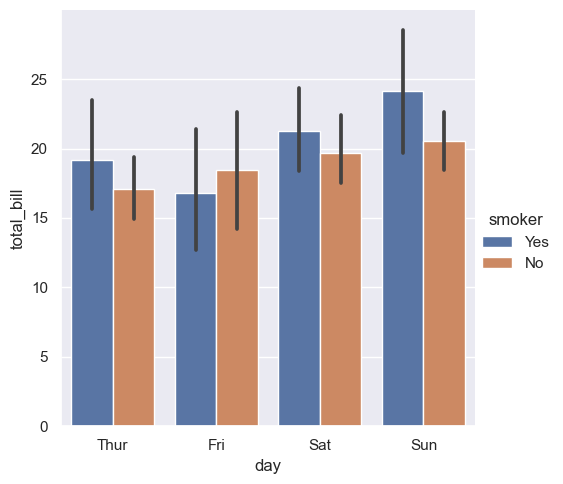

In [20]:
sns.catplot(data = tips, kind = "bar", x = "day", y = "total_bill", hue = "smoker")

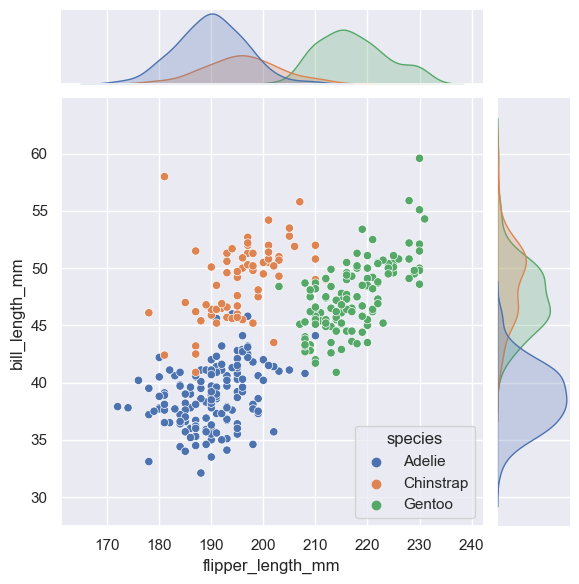

In [24]:
# Multivariate views on Complex datasets
penguins = sns.load_dataset("penguins")
sns.jointplot(data = penguins, x = "flipper_length_mm", y = "bill_length_mm", hue = "species")

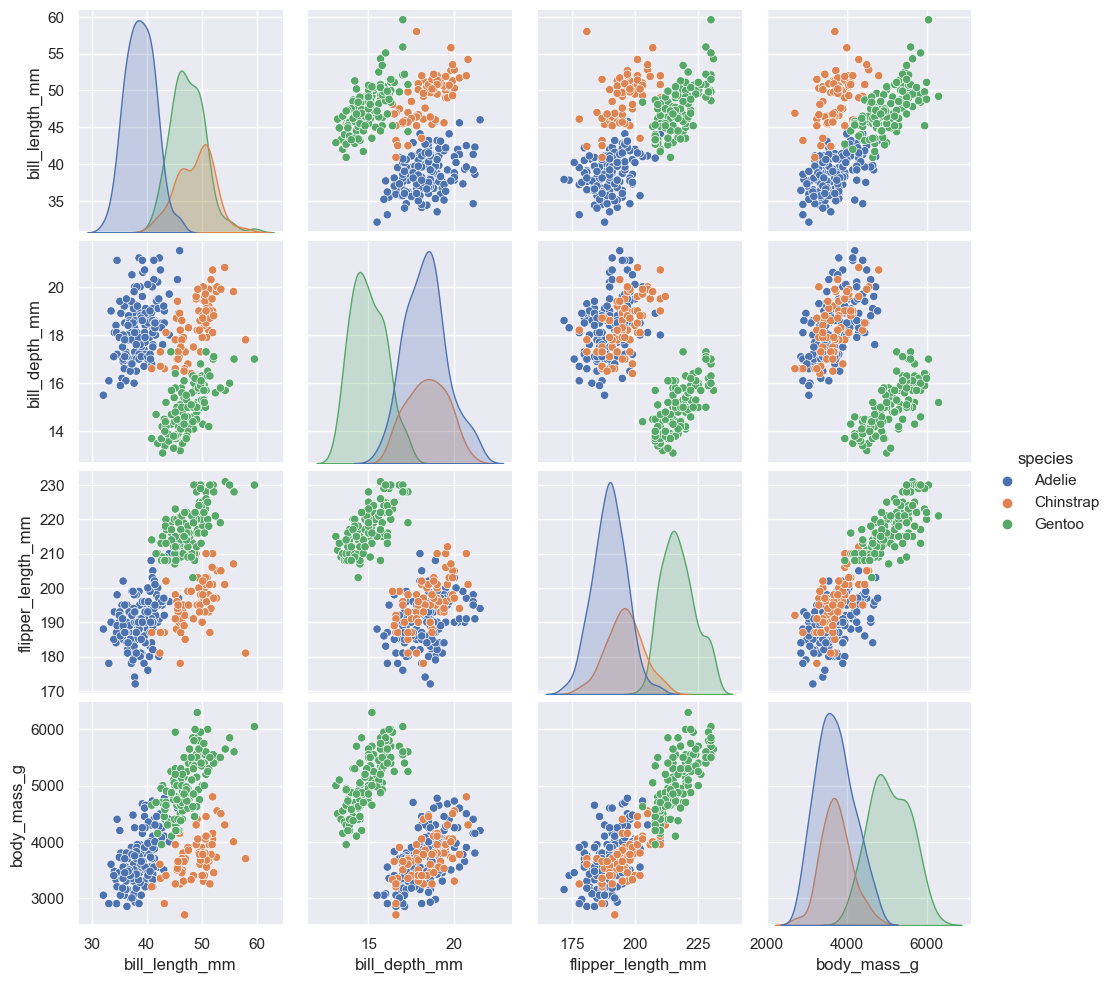

In [25]:
sns.pairplot(data = penguins, hue = "species")

In [ ]:
# Lower-level tools for building figures